<a href="https://colab.research.google.com/github/yuji-sgs/Machine-Learning/blob/main/Keras_FunctionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 使用するライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [3]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving Multiple-Outputs.csv to Multiple-Outputs.csv


In [4]:
# データフレームとして、変数dfに4列×10000行のデータを格納・確認
df = pd.read_csv(io.BytesIO(uploaded['Multiple-Outputs.csv']))
df

,x1,x2,y1,y2
0,0.15,0.01,3.255800e-02,6.521200e-02
1,0.30,0.01,2.749700e-02,5.505700e-02
2,0.45,0.01,2.075500e-02,4.153700e-02
3,0.60,0.01,1.433700e-02,2.868200e-02
4,0.75,0.01,8.508700e-03,1.701600e-02
...,...,...,...,...
9995,14.40,1.00,1.780000e-14,1.240000e-14
9996,14.55,1.00,1.820000e-14,1.510000e-14
9997,14.70,1.00,3.110000e-14,3.640000e-14
9998,14.85,1.00,2.180000e-14,4.170000e-14


In [5]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

In [7]:
# x_train, x_testではcsvファイルの1列目から2列目を，y_train, y_testでは3, 4列目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2,3]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2,3]]

In [8]:
# データの正規化
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [9]:
# モデルの構築
# inputの数:x1, x2
inputs = Input(shape=(2,))

# 学習回数
epochs = 100
batch_size = 64

# ノード数
node = 64

x1 = Dense(node, activation='relu')(inputs)
x2 = Dense(node, activation='relu')(x1)
x3 = Dense(node, activation='relu')(x2)


x4 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output1 = Dense(1, name='output1')(x4)

x5 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output2 = Dense(1, name='output2')(x5)

model = Model(inputs=inputs, outputs=[output1, output2])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss=['mse', 'mse']
)

In [10]:
# 学習オプション
history = model.fit(x_train,
                    {"output1":y_train.iloc[:, [0]], "output2":y_train.iloc[:, [1]]},
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, {"output1":y_test.iloc[:, [0]], "output2":y_test.iloc[:, [1]]})
)

Epoch 1/100
125/125 [==============================] - 3s 5ms/step - loss: 3.4828 - output1_loss: 1.6893 - output2_loss: 1.7934 - val_loss: 1.8802 - val_output1_loss: 0.8263 - val_output2_loss: 1.0539
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 1.5599 - output1_loss: 0.5025 - output2_loss: 1.0574 - val_loss: 1.1721 - val_output1_loss: 0.2264 - val_output2_loss: 0.9457
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.9979 - output1_loss: 0.1202 - output2_loss: 0.8777 - val_loss: 0.7772 - val_output1_loss: 0.0464 - val_output2_loss: 0.7308
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.6307 - output1_loss: 0.0389 - output2_loss: 0.5918 - val_loss: 0.3567 - val_output1_loss: 0.0286 - val_output2_loss: 0.3281
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1895 - output1_loss: 0.0236 - output2_loss: 0.1659 - val_loss: 0.0894 - val_output1_loss: 0.0184 - val_output2_loss: 0.

In [11]:
# 構築したモデルで予測
pred1, pred2 = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [12]:
#精度評価指標
# Output1 ====================================================================
print("=======  Output1  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 0], pred1)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 0], pred1))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 0], pred1)
print('R2：', R2)

print("")

# Output2 ====================================================================
print("=======  Output2  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 1], pred2)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 1], pred2))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 1], pred2)
print('R2：', R2)

=======  Output1  =======
MAE： 0.015728550443867676
RMSE： 0.0227376189428299
R2： 0.9997757278312376

=======  Output2  =======
MAE： 0.02770679601081276
RMSE： 0.04106129343864195
R2： 0.9991440073301294


Text(0, 0.5, 'loss')

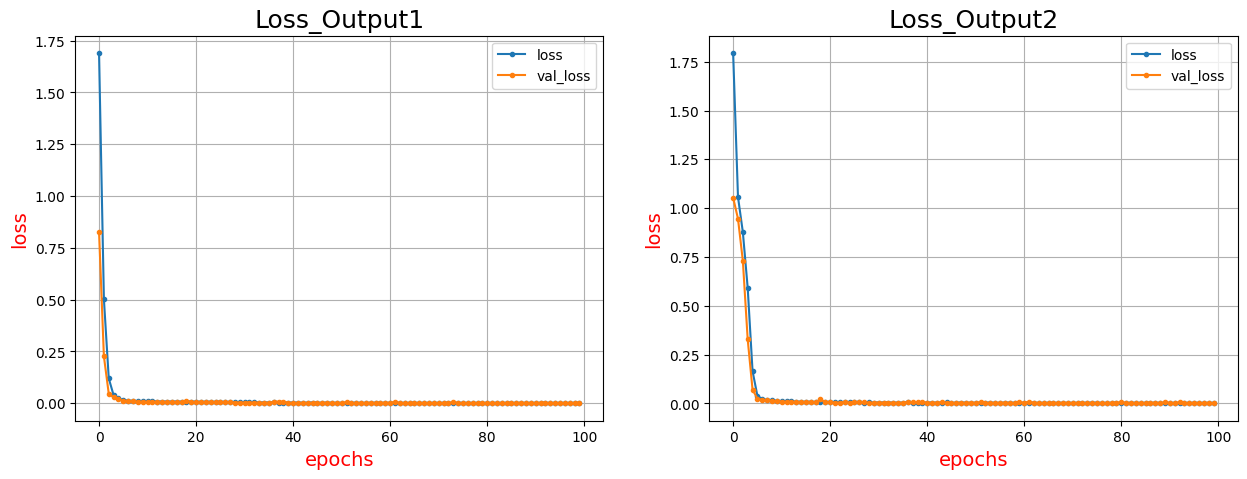

In [13]:
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
loss_graph1 = fig.add_subplot(1, 2, 1)

# x,yに要素追加
loss1 = history.history['output1_loss']
val_loss1 = history.history['val_output1_loss']
epochs1 = len(loss1)

# グラフ設定
loss_graph1.plot(range(epochs), loss1, marker='.', label='loss')
loss_graph1.plot(range(epochs), val_loss1, marker='.', label='val_loss')
loss_graph1.set_title("Loss_Output1", size = 18)
loss_graph1.legend(loc='best')
loss_graph1.grid()
loss_graph1.set_xlabel("epochs", size = 14, color = "r")
loss_graph1.set_ylabel("loss", size = 14, color = "r")

#==============================================================================
# Output2 ====================================================================
# 1×2 の2枚目に描画する
loss_graph2 = fig.add_subplot(1, 2, 2)

# x,yに要素追加
loss2 = history.history['output2_loss']
val_loss2 = history.history['val_output2_loss']
epochs2 = len(loss2)

# グラフ設定
loss_graph2.plot(range(epochs), loss2, marker='.', label='loss')
loss_graph2.plot(range(epochs), val_loss2, marker='.', label='val_loss')
loss_graph2.set_title("Loss_Output2", size = 18)
loss_graph2.legend(loc='best')
loss_graph2.grid()
loss_graph2.set_xlabel("epochs", size = 14, color = "r")
loss_graph2.set_ylabel("loss", size = 14, color = "r")
#==============================================================================

Text(0, 0.5, 'predicted_data')

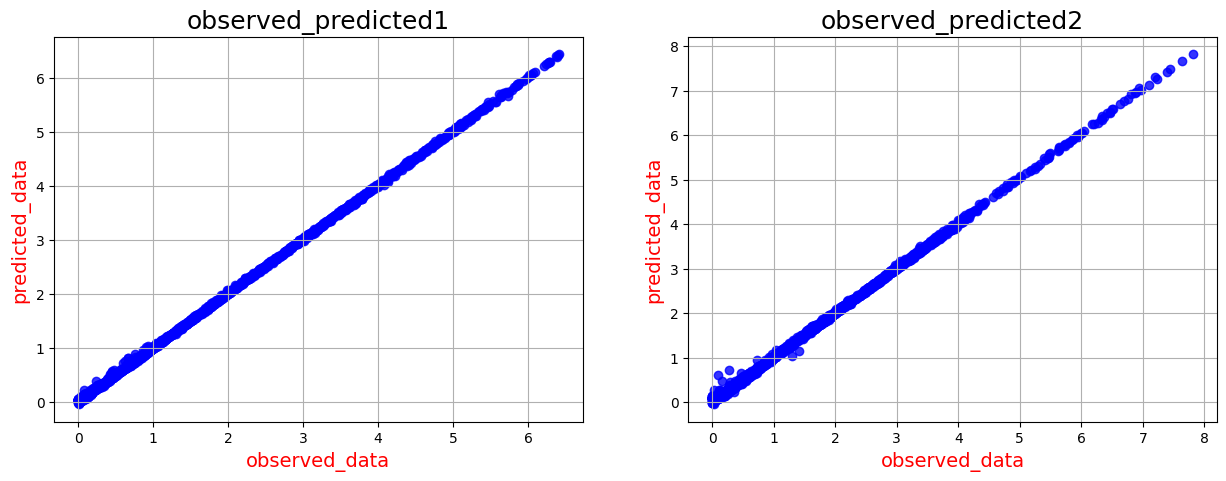

In [14]:
# Observed-Predicted Plot
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
yy1 = fig.add_subplot(1, 2, 1)

yy1.scatter(y_test.iloc[:, 0], pred1, c='blue', alpha=0.8)

# グラフ設定
yy1.set_title("observed_predicted1", size = 18)
yy1.grid()
yy1.set_xlabel("observed_data", size = 14, color = "r")
yy1.set_ylabel("predicted_data", size = 14, color = "r")

# Output2 ====================================================================
# 1×2 の2枚目に描画する
yy2 = fig.add_subplot(1, 2, 2)

yy2.scatter(y_test.iloc[:, 1], pred2, c='blue', alpha=0.8)

# グラフ設定
yy2.set_title("observed_predicted2", size = 18)
yy2.grid()
yy2.set_xlabel("observed_data", size = 14, color = "r")
yy2.set_ylabel("predicted_data", size = 14, color = "r")